In [24]:
# Setup
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

According to the United Nations, Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, human activities have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

This Analysis provides insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies).

# Importing the Dataset

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Key Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

This sheet contain the amount of CO2 by country and the industry responsible. 

| Key Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

In [28]:
plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

In [29]:
# The datasets has regions all over the world. We need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

# Seperating the dateset into two seperate Datasets
ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')
totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')

In [31]:
# Displaying the dataset for IPCC 2006 
ipcc_2006_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
42,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,468.101210,468.101210,...,878.017490,876.424760,694.984348,628.393538,716.208742,745.933600,790.238440,796.965524,806.888450,835.471254
43,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,9803.605447,9803.605447,...,18457.831374,18758.674388,19052.717572,19338.111419,19616.705006,19909.315374,20177.076755,20441.554365,20904.334177,20904.334177
44,Non-Annex_I,Southern_Africa,AGO,Angola,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1168.997514,1149.912236,...,2224.584701,3824.749751,3521.645794,3651.157894,4482.919263,4500.168653,4686.371296,4779.221426,4386.060462,4085.260834
46,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,137.584287,137.584287,...,2699.129471,3993.658132,5669.710708,6130.962446,4198.262959,4071.508850,4016.468964,4612.129507,4304.458056,4687.903324


In [32]:
# Displaying the dataset for Totals CO2 by country
totals_by_country_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,...,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,...,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,...,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,...,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [30]:
# Reading the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')
temperatures.head()

,Year,Ethiopia,Mozambique,Nigeria,Tunisia
0,1960,22.59,23.82,26.87,19.78
1,1961,22.30,24.00,26.28,19.67
2,1962,22.36,23.77,26.68,19.37
3,1963,22.56,23.27,27.02,19.33
4,1964,22.15,23.47,26.66,19.41


# Cleaning the Datasets

In [33]:
# Working on the IPCC 2006 dataset 

# renaming columns
ipcc = ipcc_2006_africa.rename(columns={'C_group_IM24_sh':'Region', 'Country_code_A3':'Code', 'ipcc_code_2006_for_standard_report_name':'Industry'}, inplace=True)

# droping irrelevant columns from the dataset
ipcc = ipcc_2006_africa.drop(['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'], axis=1)

# melting the dataset to have the Years and CO2 levels as columns 
ipcc = ipcc.melt(id_vars=['Region', 'Code', 'Name', 'Industry', 'fossil_bio'], var_name='Year', value_name='CO2')

# Treating the resulting dataset by droping missing values and converting column type
ipcc = ipcc.dropna(subset=['CO2'])
ipcc['Year'] = ipcc['Year'].str.replace('Y_','').astype('int64')

# Displaying the resulting dateset
ipcc_2006_africa = ipcc
ipcc_2006_africa.head()

,Region,Code,Name,Industry,fossil_bio,Year,CO2
0,Southern_Africa,AGO,Angola,Manufacturing Industries and Construction,bio,1970,468.101210
1,Southern_Africa,AGO,Angola,Residential and other sectors,bio,1970,9803.605447
3,Southern_Africa,AGO,Angola,Emissions from biomass burning,bio,1970,1168.997514
4,Southern_Africa,AGO,Angola,Main Activity Electricity and Heat Production,fossil,1970,137.584287
5,Southern_Africa,AGO,Angola,Petroleum Refining - Manufacture of Solid Fuel...,fossil,1970,74.805080


In [34]:
# Working on the totals by country dataset

# renaming columns
totals = totals_by_country_africa.rename(columns={'C_group_IM24_sh':'Region', 'Country_code_A3':'Code'}, inplace=True)

# droping irrelevant columns from the dataset
totals = totals_by_country_africa.drop(['IPCC_annex', 'Substance'], axis='columns')

# melting the dataset to have the Years and CO2 levels as columns 
totals = totals.melt(id_vars=['Region', 'Code', 'Name'], var_name='Year', value_name='CO2')

# Treating the resulting dataset by droping missing values and converting column type
totals = totals.dropna(subset=['CO2'])
totals['Year'] = totals['Year'].str.replace('Y_','').astype('int64')

# Displaying the resulting dateset
totals_by_country_africa = totals
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888


In [35]:
# Checking the shape of the new datasets
print('ipcc_2006_africa:', ipcc_2006_africa.shape)
print('totals_by_country_africa:', totals_by_country_africa.shape)

ipcc_2006_africa: (46741, 7)
totals_by_country_africa: (2912, 5)


# Visual of CO2 levels trend in Africa over time

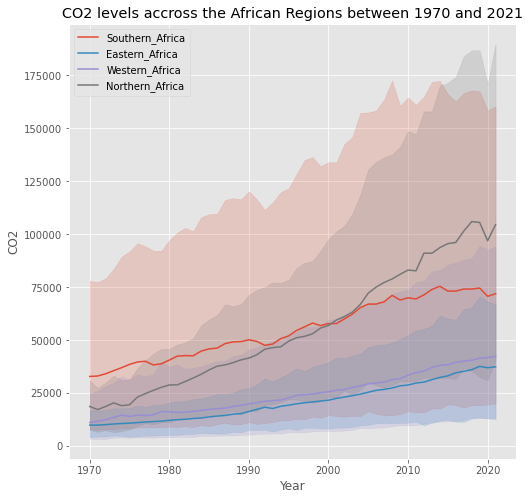

In [115]:
# Showing the trend of CO2 levels across the african regions

g = sns.lineplot(data=totals_by_country_africa, x='Year', y='CO2', hue='Region')
g.set_title('CO2 levels accross the African Regions between 1970 and 2021')
plt.legend(loc='upper left')
plt.gcf().set_size_inches(8,8)
plt.show()

- We see from the chart that CO2 levels within African countries have been increasing over time from the year 1970 to 2021
- We can also see that North African and South African countries have always had the highest rate of CO2 emmision 
- Although South African Countries use to have the highest CO2 emmision prior to the 2000, North African countries have since overtaking them significantly starting from the early 2000s

# The rate at which CO2 levels are increasing in African Regions

In [37]:
# Dertermining the relationship between the years from 1970 to 2021 and the CO2 levels acrross the African regions

relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region')[['Year', 'CO2']].corr(method='spearman')
print(relationship_btw_time_CO2)

                          Year       CO2
Region                                  
Eastern_Africa  Year  1.000000  0.181768
                CO2   0.181768  1.000000
Northern_Africa Year  1.000000  0.429875
                CO2   0.429875  1.000000
Southern_Africa Year  1.000000  0.260986
                CO2   0.260986  1.000000
Western_Africa  Year  1.000000  0.324071
                CO2   0.324071  1.000000


Spearman’s rank correlation was computed to assess the relationship between time (Years) and the CO2 levels of African countries.

This correlation is done to see the rate at which CO2 levels are increasing in each African region.

There was a positive correlation between the two variables for each region with;
- North African countries having a signicant increase over time at a rate of 0.43
- This is followed by West African countries with an increase rate of 0.32
- Next are South African countries with an increase rate of 0.26
- Lastly is East African countries with an increase rate of 0.18

# Industries with High CO2 levels

Determining the most common (top 5) industries in each African region

In [38]:
# Grouping the dateset by region and industry columns. Then creating a new column that counts the number of time each instry appears
count = ipcc_2006_africa.groupby(['Region','Industry']).size().reset_index(name='Count')

# organising the data in descending order of count and selecting the top 5 industries for each region
count = count.sort_values(by=['Region', 'Count'], ascending=[True, False])
top_5_industries = count.groupby('Region').head(5).reset_index(drop=True)
top_5_industries

,Region,Industry,Count
0,Eastern_Africa,Residential and other sectors,1454
1,Eastern_Africa,Manufacturing Industries and Construction,1383
2,Eastern_Africa,Main Activity Electricity and Heat Production,1174
3,Eastern_Africa,Road Transportation no resuspension,742
4,Eastern_Africa,Glass Production,728
5,Northern_Africa,Residential and other sectors,572
6,Northern_Africa,Manufacturing Industries and Construction,456
7,Northern_Africa,Main Activity Electricity and Heat Production,315
8,Northern_Africa,Glass Production,312
9,Northern_Africa,Non-Energy Products from Fuels and Solvent Use,312


# Identifying the Industires to look out for

Determining the industry responsile for the most amount of CO2 (on average) in each african region

In [40]:
# Getting the average CO2 level for each industries
avg_co2 = ipcc_2006_africa.groupby(['Region', 'Industry'])['CO2'].mean().reset_index()

# Getting the industries with the highest average CO2 emmision for each African region 
max_co2_industries = avg_co2.loc[avg_co2.groupby('Region')['CO2'].idxmax()].reset_index(drop=True)
max_co2_industries

,Region,Industry,CO2
0,Eastern_Africa,Residential and other sectors,7904.439282
1,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
2,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
3,Western_Africa,Residential and other sectors,8702.936136


- We see that the industry 'Main Activity Electricity and Heat Production' has the highest average CO2 levels in both Northern & Southern Africa.
- While 'Residential and other sectors' has the highest average CO2 levels in both Eastern and Western Africa.

# CO2 levels prediction for the next 5 years 

Predicting the CO2 levels at each african region in the next 5 years

In [72]:
# Creating a new dataset for the years to predict
df = pd.read_csv('newdata.csv')
df

,Year,Region
0,2022,Eastern_Africa
1,2022,Western_Africa
2,2022,Southern_Africa
3,2022,Northern_Africa
4,2023,Eastern_Africa
5,2023,Western_Africa
6,2023,Southern_Africa
7,2023,Northern_Africa
8,2024,Eastern_Africa
9,2024,Western_Africa


In [73]:
# Preparing the data for predicting by one-hot-encoding it
newdata = pd.get_dummies(df)
newdata

,Year,Region_Eastern_Africa,Region_Northern_Africa,Region_Southern_Africa,Region_Western_Africa
0,2022,True,False,False,False
1,2022,False,False,False,True
2,2022,False,False,True,False
3,2022,False,True,False,False
4,2023,True,False,False,False
5,2023,False,False,False,True
6,2023,False,False,True,False
7,2023,False,True,False,False
8,2024,True,False,False,False
9,2024,False,False,False,True


In [74]:
# Creating dependent and independent variables that would be fitted into a model to make prediction
X = pd.get_dummies(totals_by_country_africa[['Region', 'Year']])
y = np.log10(totals_by_country_africa['CO2'])

# Creating a Linear regression model
reg = LinearRegression()
reg.fit(X,y)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10**predicted_co2, 2)

In [76]:
# Putting the predicted values for each African region by year back in the dataset
pred_newdata = df
pred_newdata['CO2'] = predicted_co2
pred_newdata

,Year,Region,CO2
0,2022,Eastern_Africa,13978.97
1,2022,Western_Africa,9936.02
2,2022,Southern_Africa,34779.25
3,2022,Northern_Africa,37837.23
4,2023,Eastern_Africa,14367.65
5,2023,Western_Africa,10212.29
6,2023,Southern_Africa,35746.26
7,2023,Northern_Africa,38889.26
8,2024,Eastern_Africa,14767.13
9,2024,Western_Africa,10496.23


# CO2 Levels on Temperature of African Countries 

Determining if CO2 levels affect the annual temperature in the selected African Countries

In [81]:
# countries we want to check
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

# selecting from both IPCC 2006 and Total by countries dataset
selected_countries = ipcc_2006_africa = totals_by_country_africa[['Name', 'Year', 'CO2']].query('Name in @countries')

# melting the temperature dataset to have just three columns (Name, Year, Temperature)
temp_long = temperatures.melt(id_vars='Year', var_name='Name', value_name='Temperature')

# Joing both the selected coubtries dataset with the temp_long dataset
joined = selected_countries.merge(temp_long, on=['Name', 'Year'], how='inner')

joined

,Name,Year,CO2,Temperature
0,Ethiopia,1970,43392.140923,22.81
1,Mozambique,1970,24200.035990,24.10
2,Nigeria,1970,161347.912692,26.91
3,Tunisia,1970,5725.783312,19.42
4,Ethiopia,1971,43458.192502,22.30
...,...,...,...,...
203,Tunisia,2020,31486.838616,20.87
204,Ethiopia,2021,201641.675813,23.35
205,Mozambique,2021,36771.841809,24.53
206,Nigeria,2021,611144.166997,27.67


Using scatterplot to see the relatioship between CO2 levels and temperature of the selected countries

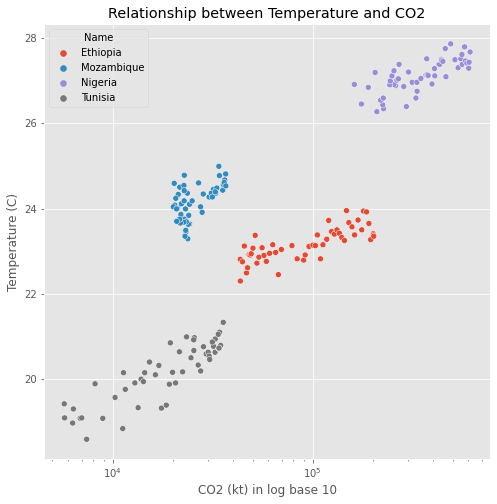

In [113]:
ax = sns.scatterplot(x='CO2', y='Temperature', data=joined, hue='Name')
ax.set_xscale('log')
ax.set(xlabel='CO2 (kt) in log base 10', ylabel='Temperature (C)')
ax.set_title('Relationship between Temperature and CO2')
plt.gcf().set_size_inches(8,8)
plt.show()

In [105]:
# Using correlation to see the relationship between CO2 levels and Temperature
joined.groupby('Name')[['Temperature', 'CO2']].corr()

Temperature       CO2
Name                                         
Ethiopia   Temperature     1.000000  0.766674
           CO2             0.766674  1.000000
Mozambique Temperature     1.000000  0.565325
           CO2             0.565325  1.000000
Nigeria    Temperature     1.000000  0.752935
           CO2             0.752935  1.000000
Tunisia    Temperature     1.000000  0.857801
           CO2             0.857801  1.000000

The Scatterplot and the Corr table shows that there is a strong positive relationship between the CO2 level of these selected countries and their temperatures.

The higher their CO2 emmision, the higher their temperatures.

In [82]:
# a linear model of Temperature by CO2 and Name

model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          1.22e-182
Time:                        14:23:05   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""